Chapter 03

# 方差分析，多元线性回归
Book_7《机器学习》 | 鸢尾花书：从加减乘除到机器学习

In [1]:
# initializations
import pandas as pd
# import pandas_datareader as web
import yfinance as yf
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as stats

In [3]:
tickers = ['^GSPC','TSLA','WMT','MCD','USB',
           'YUM','NFLX','JPM','PFE',
           'F','GM','COST','JNJ'];

stock_levels_df = yf.download(tickers, start='2020-07-01', end='2020-12-31')
# stock_levels_df.to_csv('stock_levels_df.csv')
# stock_levels_df.to_pickle('stock_levels_df.pkl')

[*********************100%%**********************]  13 of 13 completed


In [4]:
y_X_df = stock_levels_df['Adj Close'].pct_change()
y_X_df.dropna(inplace = True)

y_X_df.rename(columns={"^GSPC": "SP500"},inplace = True)
X_df = y_X_df[tickers[1:]]
y_df = y_X_df[['SP500']]

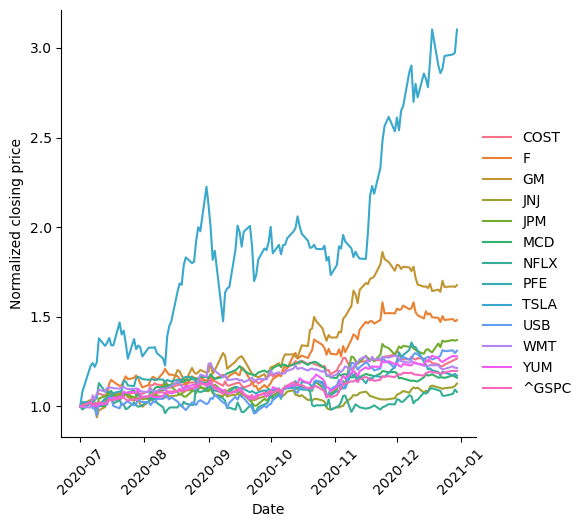

In [5]:
labels = ['SP500','TSLA','WMT','MCD','USB',
           'YUM','NFLX','JPM','PFE',
           'F','GM','COST','JNJ'];

#%% Lineplot of stock prices


# normalize the initial stock price levels to 1
normalized_stock_levels = stock_levels_df['Adj Close']/stock_levels_df['Adj Close'].iloc[0]

g = sns.relplot(data=normalized_stock_levels,dashes = False,
                kind="line") # , palette="coolwarm"
g.set_xlabels('Date')
g.set_ylabels('Normalized closing price')
g.set_xticklabels(rotation=45)

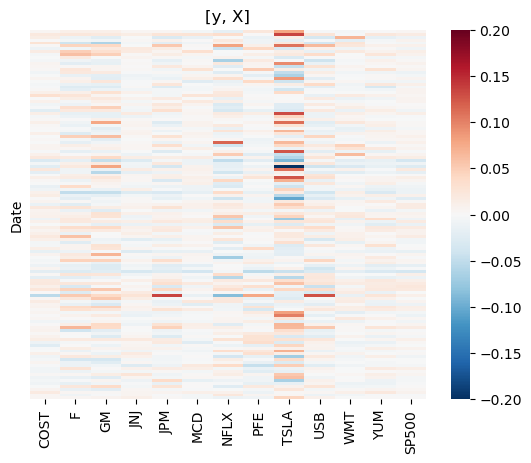

In [6]:
fig, ax = plt.subplots()
ax = sns.heatmap(y_X_df,
                 cmap='RdBu_r',
                 cbar_kws={"orientation": "vertical"}, 
                 yticklabels=False,
                 vmin = -0.2, vmax = 0.2)
plt.title('[y, X]')

#%% Heatmap of covariance matrix

SIGMA = y_X_df.cov()

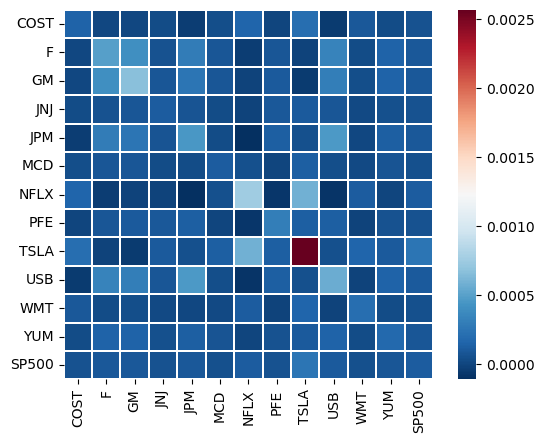

In [7]:
fig, axs = plt.subplots()

h = sns.heatmap(SIGMA,cmap='RdBu_r', linewidths=.05)
h.set_aspect("equal")

vols = np.sqrt(np.diag(SIGMA))

Text(0, 0.5, 'Daily volatility (standard deviation)')

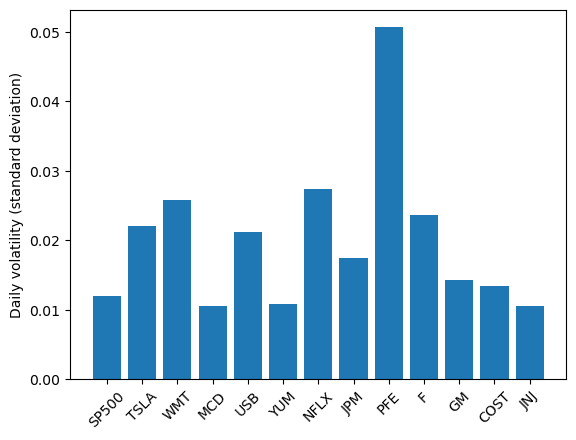

In [8]:
fig, ax = plt.subplots()

plt.bar(labels,vols)
plt.xticks(rotation = 45) 
# Rotates X-Axis Ticks by 45-degrees
plt.ylabel('Daily volatility (standard deviation)')

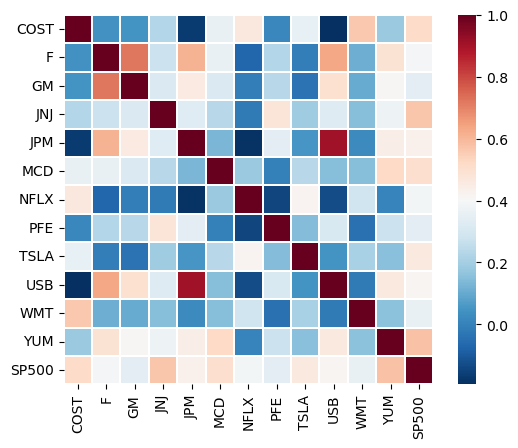

In [9]:
#%% Heatmap of correlation matrix

fig, ax = plt.subplots()
# Compute the correlation matrix
RHO = y_X_df.corr()

h = sns.heatmap(RHO, cmap="RdBu_r",
            square=True, linewidths=.05,
            annot=False)
h.set_aspect("equal")

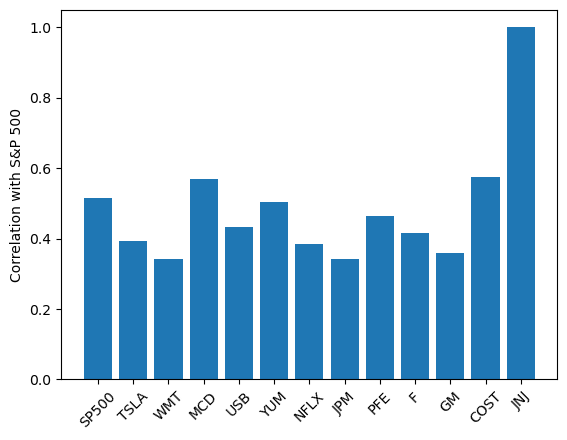

In [10]:
fig, ax = plt.subplots()

plt.bar(labels,RHO['SP500'].iloc[:].values)
plt.xticks(rotation = 45) 
# Rotates X-Axis Ticks by 45-degrees
plt.ylabel('Correlation with S&P 500')
RHO.to_excel('corr.xlsx')

                            OLS Regression Results                            
Dep. Variable:                  SP500   R-squared:                       0.774
Model:                            OLS   Adj. R-squared:                  0.750
Method:                 Least Squares   F-statistic:                     32.24
Date:                Tue, 14 Nov 2023   Prob (F-statistic):           5.73e-31
Time:                        16:51:56   Log-Likelihood:                 489.68
No. Observations:                 126   AIC:                            -953.4
Df Residuals:                     113   BIC:                            -916.5
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0005      0.000     -0.974      0.3

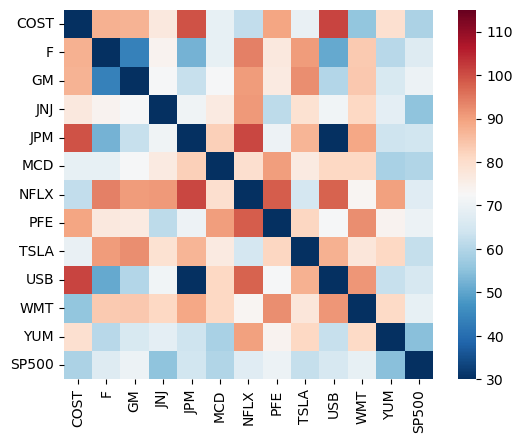

In [11]:
#%% Volatility vector space

Angles = np.arccos(RHO)*180/np.pi
fig, axs = plt.subplots()

h = sns.heatmap(Angles, annot=False,cmap='RdBu_r',
                vmin = 30, vmax = 115)
h.set_aspect("equal")
Angles.to_excel('output.xlsx')
#%% Regression

import statsmodels.api as sm

# add a column of ones
X_df = sm.add_constant(X_df)

model = sm.OLS(y_df, X_df)
results = model.fit()
print(results.summary())

p = model.fit().params
print(p)